In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Define dataset path
dataset_path = "PlantVillage_Final/"

# Image parameters
IMG_SIZE = 128  # Resize images to 128x128
data = []  # Image data
labels = []  # Labels (disease categories)

# Get class labels (disease categories)
class_labels = os.listdir(dataset_path)
print("Classes:", class_labels)

# Load and preprocess images
for label in class_labels:
    class_path = os.path.join(dataset_path, label)
    label_index = class_labels.index(label)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image
            data.append(img)
            labels.append(label_index)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spid

In [13]:
# Convert to NumPy arrays and normalize images
data = np.array(data) / 255.0
labels = np.array(labels)

In [16]:
# Split into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
ytrain = to_categorical(ytrain, num_classes=len(class_labels))
ytest = to_categorical(ytest, num_classes=len(class_labels))

(4852, 128, 128, 3)


In [ ]:
# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         4,902 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,666,982 (6.36 MB)

 Trainable params: 1,666,982 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=5, batch_size=64)

Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.0811 - loss: 3.4325 - val_accuracy: 0.0841 - val_loss: 3.3847
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.0917 - loss: 3.4362 - val_accuracy: 0.0841 - val_loss: 3.3735
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.0907 - loss: 3.4215 - val_accuracy: 0.0841 - val_loss: 3.3811
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.0888 - loss: 3.3955 - val_accuracy: 0.0841 - val_loss: 3.3915
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.0944 - loss: 3.4077 - val_accuracy: 0.0841 - val_loss: 3.3751


<Axes: title={'center': 'Epochs vs Loss'}, xlabel='Epochs', ylabel='Loss'>

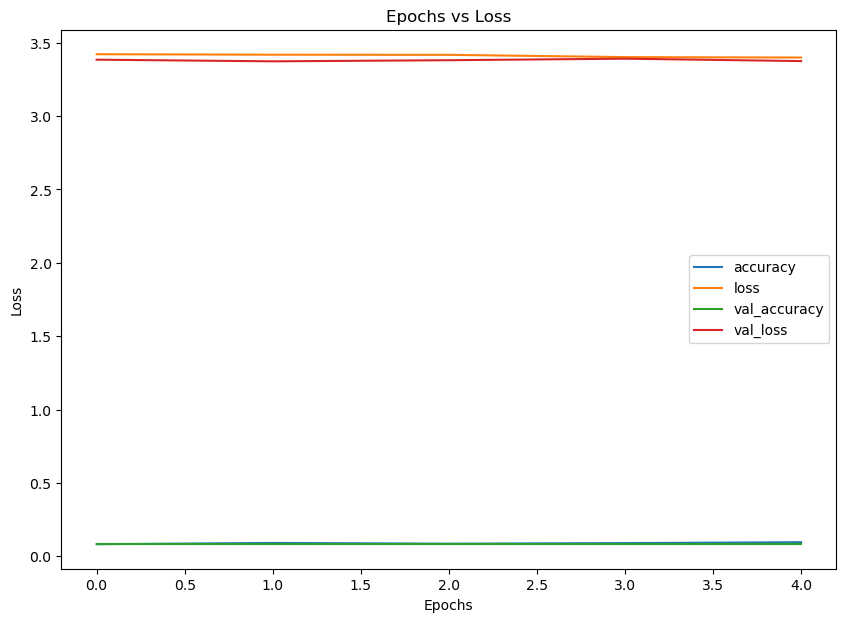

In [21]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="Epochs", ylabel="Loss", title="Epochs vs Loss")